# Exploring L and M to H Ratios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
path = 'G:/My Drive/Data/data/20240530 modifying triple silac/preprocessing/filtered_report.tsv'

In [53]:
df = pd.read_csv(f"{path}", sep='\t')

In [54]:
df.replace(0.0, np.nan, inplace=True)
df.head()

,Unnamed: 0,Run,Protein.Group,Precursor.Id,Label,Precursor.Quantity,Ms1.Translated,Precursor.Translated
0,NaN,3D_double_aux_1,P0CG40-SP9,AAAAAAAAAAAAAAAASAGGKEAASGPNDS3,L,NaN,7291730.0,NaN
1,1.0,3D_repeat_1,P0CG40-SP9,AAAAAAAAAAAAAAAASAGGKEAASGPNDS3,L,NaN,NaN,NaN
2,2.0,3D_repeat_2,P0CG40-SP9,AAAAAAAAAAAAAAAASAGGKEAASGPNDS3,L,NaN,4846880.0,NaN
3,3.0,3D_repeat_3,P0CG40-SP9,AAAAAAAAAAAAAAAASAGGKEAASGPNDS3,L,NaN,5297570.0,NaN
4,4.0,E_1,P0CG40-SP9,AAAAAAAAAAAAAAAASAGGKEAASGPNDS3,L,NaN,NaN,NaN


In [55]:
df = df.pivot_table(index=['Run','Protein.Group', 'Precursor.Id'], columns='Label', values = ['Ms1.Translated', 'Precursor.Quantity', 'Precursor.Translated'])

Get href df

In [56]:
# Index precursor and ms1 transalted H from pivoted df and format new df containing all H_ref information

# Access the 'Ms1.Translated' and 'Precursor.Translated' columns under the 'H' label
ms1_translated_h = df.loc[:, ('Ms1.Translated', 'H')]
precursor_translated_h = df.loc[:, ('Precursor.Translated', 'H')]

# Combine into a new DataFrame
combined_df = pd.DataFrame({
    'Ms1.Translated_H': ms1_translated_h,
    'Precursor.Translated_H': precursor_translated_h
})

# Reset index to include 'Run', 'Protein.Group', and 'Precursor.Id' as columns
combined_H_df = combined_df.reset_index()

# Rename columns for clarity
combined_H_df.columns = ['Run', 'Protein.Group', 'Precursor.Id', 'Ms1.Translated_H', 'Precursor.Translated_H']

# Display the resulting DataFrame
combined_H_df

,Run,Protein.Group,Precursor.Id,Ms1.Translated_H,Precursor.Translated_H
0,3D_double_1,A0A024RBG1-NUDT4B,LLGIFEQNQDR2,1880780.0,418325.0
1,3D_double_1,A0A024RBG1-NUDT4B,LLGIFEQNQDR3,NaN,NaN
2,3D_double_1,A0A075B6Z8-TRAJ25,XEGQGFSFIFGK2,NaN,NaN
3,3D_double_1,A0A075B6Z8-TRAJ25,XEGQGFSFIFGK3,NaN,NaN
4,3D_double_1,A0A096LP01-SMIM26,DGSASEVPSELSERPK2,NaN,104355.0
...,...,...,...,...,...
3643017,G3_aux_3,Q9NPI7-KRCC1,LPSETIQTYPR3,NaN,NaN
3643018,G3_aux_3,Q9NS82-SLC7A10,EGHLPSLLAM(UniMod:35)IHVR4,NaN,NaN
3643019,G3_aux_3,Q9NTI2-ATP8A2,ITQNGEGFNTK3,NaN,NaN
3643020,G3_aux_3,Q9UBD9-CLCF1,SLAGTYLNYLGPPFNEPDFNPPR3,NaN,NaN


In [57]:
combined_H_df = combined_H_df.copy(deep = True)

combined_H_df = combined_H_df.dropna(subset=['Precursor.Translated_H','Ms1.Translated_H'])
combined_H_df

,Run,Protein.Group,Precursor.Id,Ms1.Translated_H,Precursor.Translated_H
0,3D_double_1,A0A024RBG1-NUDT4B,LLGIFEQNQDR2,1880780.0,418325.0
7,3D_double_1,A0A0B4J2D5;P0DPI2-GATD3;GATD3B,EVVEAHVDQK2,3138290.0,1651850.0
8,3D_double_1,A0A0B4J2D5;P0DPI2-GATD3;GATD3B,GGAEVQIFAPDVPQMHVIDHTK3,5223570.0,3024060.0
9,3D_double_1,A0A0B4J2D5;P0DPI2-GATD3;GATD3B,GGAEVQIFAPDVPQMHVIDHTK4,6432530.0,2085770.0
10,3D_double_1,A0A0B4J2D5;P0DPI2-GATD3;GATD3B,GVEVTVGHEQEEGGK2,2393930.0,1029720.0
...,...,...,...,...,...
3642766,G3_aux_3,Q9Y287-ITM2B,DPDDVVPVGQR2,668243.0,187852.0
3642773,G3_aux_3,P12314-FCGR1A,KVISSLQEDR2,7190490.0,6622100.0
3642791,G3_aux_3,Cont_P68138;P68133-ACTA1,DLYANNVMSGGTTMYPGIADR3,875028.0,6676900.0
3642806,G3_aux_3,A6NHQ4-EPOP,ESTTSFASAPPRPAPGLEPQR3,3145360.0,118247.0


In [58]:
def combined_median(ms1_series, precursor_series):
    combined_series = np.concatenate([ms1_series, precursor_series])
    combined_series = np.log10(combined_series)  # Log-transform the combined series
    return np.median(combined_series)  # Return the median of the log-transformed values
 
# Group by protein group and apply the custom aggregation
grouped = combined_H_df.groupby(['Protein.Group']).apply(lambda x: pd.Series({
    'href': combined_median(x['Ms1.Translated_H'], x['Precursor.Translated_H']) 
})).reset_index()


href_df =  grouped[['Protein.Group', 'href']]
href_df

,Protein.Group,href
0,A0A024RBG1-NUDT4B,6.009824
1,A0A096LP01-SMIM26,5.707955
2,A0A0B4J2D5;P0DPI2-GATD3;GATD3B,6.643144
3,A0A0B4J2F0-PIGBOS1,6.475246
4,A0A0G2JMD5-PRAMEF33,5.923306
...,...,...
7538,Q9Y6X8-ZHX2,5.601929
7539,Q9Y6X9-MORC2,5.989078
7540,Q9Y6Y0-IVNS1ABP,5.788172
7541,Q9Y6Y8-SEC23IP,6.527950


Get protein level ratios for L

1. Add L/H and M/H ratio columns

In [ ]:
 df['Precursor.Translated L/H'] = df['Precursor.Translated L'] / df['Precursor.Translated H']
        df['Ms1.Translated L/H'] = df['Ms1.Translated L'] / df['Ms1.Translated H']
        
        df['Precursor.Translated M/H'] = df['Precursor.Translated M'] / df['Precursor.Translated H'] 
        df['Ms1.Translated M/H'] = df['Ms1.Translated M'] / df['Ms1.Translated H']

In [59]:
# Access the 'Ms1.Translated' and 'Precursor.Translated' columns under the 'H' label
ms1_translated_l = df.loc[:, ('Ms1.Translated', 'L')]
precursor_translated_l = df.loc[:, ('Precursor.Translated', 'L')]

# Combine into a new DataFrame
combined_df = pd.DataFrame({
    'Ms1.Translated_L': ms1_translated_l,
    'Precursor.Translated_L': precursor_translated_l
})

# Reset index to include 'Run', 'Protein.Group', and 'Precursor.Id' as columns
combined_L_df = combined_df.reset_index()

# Rename columns for clarity
combined_L_df.columns = ['Run', 'Protein.Group', 'Precursor.Id', 'Ms1.Translated_L', 'Precursor.Translated_L']

# Display the resulting DataFrame
combined_L_df

,Run,Protein.Group,Precursor.Id,Ms1.Translated_L,Precursor.Translated_L
0,3D_double_1,A0A024RBG1-NUDT4B,LLGIFEQNQDR2,1565240.0,264608.0
1,3D_double_1,A0A024RBG1-NUDT4B,LLGIFEQNQDR3,NaN,NaN
2,3D_double_1,A0A075B6Z8-TRAJ25,XEGQGFSFIFGK2,811915.0,388804.0
3,3D_double_1,A0A075B6Z8-TRAJ25,XEGQGFSFIFGK3,NaN,NaN
4,3D_double_1,A0A096LP01-SMIM26,DGSASEVPSELSERPK2,NaN,42378.9
...,...,...,...,...,...
3643017,G3_aux_3,Q9NPI7-KRCC1,LPSETIQTYPR3,2813480.0,1685650.0
3643018,G3_aux_3,Q9NS82-SLC7A10,EGHLPSLLAM(UniMod:35)IHVR4,NaN,NaN
3643019,G3_aux_3,Q9NTI2-ATP8A2,ITQNGEGFNTK3,NaN,NaN
3643020,G3_aux_3,Q9UBD9-CLCF1,SLAGTYLNYLGPPFNEPDFNPPR3,NaN,NaN


In [ ]:
runs = combined_L_df['Run'].unique()
runs_list = []

# Drop non shared precursor and ms1 translated ratios for L/H and M/H
df = combined_L_df.dropna(subset=['Precursor.Translated L/H','Ms1.Translated L/H'])

for run in tqdm(runs, desc='Computing protein level ratios for each run'):
    run_df = df[df['Run'] == run]

    def combined_median(ms1_series, precursor_series):
        combined_series = np.concatenate([ms1_series, precursor_series])
        combined_series = np.log10(combined_series)  # Log-transform the combined series
        return np.median(combined_series)  # Return the median of the log-transformed values
     
    # Group by protein group and apply the custom aggregation
    grouped = run_df.groupby(['Protein.Group']).apply(lambda x: pd.Series({
        'H': combined_median(x['Ms1.Translated H'], x['Precursor.Translated H']),
        'L/H ratio': combined_median(x['Ms1.Translated L/H'], x['Precursor.Translated L/H']),
        'M/H ratio': combined_median(x['Ms1.Translated M/H'], x['Precursor.Translated M/H'])})).reset_index()
    
    grouped['Run'] = run
    runs_list.append(grouped)

result = pd.concat(runs_list, ignore_index=True)

cols = ['Run','Protein.Group', 'L/H ratio', 'M/H ratio', 'H']

In [3]:
path = "G:/My Drive/Data/main experiments/20240527 eIF4F with Chiara/eIF/preprocessing/formatted_precursors.tsv"
df = pd.read_csv(f"{path}", sep='\t')

C:\Users\robbi\AppData\Local\Temp\ipykernel_9672\385759431.py:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}", sep='\t')


In [7]:
df_sorted = df.sort_values(by='Precursor.Translated L/H', ascending=False)
df_sorted.head()

,Unnamed: 0,Run,Protein.Group,Precursor.Id,Label L,Ms1.Translated L,Precursor.Quantity L,Precursor.Translated L,Label M,Ms1.Translated M,Precursor.Quantity M,Precursor.Translated M,Label H,Ms1.Translated H,Precursor.Quantity H,Precursor.Translated H,Precursor.Translated L/H,Ms1.Translated L/H,Precursor.Translated M/H,Ms1.Translated M/H
1216256,1216256,E_2,O75907-DGAT1,TGSRPSSHGGGGPAAAEEEVR4,L,NaN,751700.0,751700.0,NaN,NaN,NaN,NaN,H,NaN,224499.0,432.42,1738.356228,NaN,NaN,NaN
1789243,1789243,G1_2,P35580-MYH10,TTLQVDTLNAELAAER3,L,69061300.0,564974.0,2017210.0,M,69061300.0,568772.0,568772.0,H,NaN,3949930.0,1643.87,1227.110416,NaN,345.995730,NaN
2045988,2045988,G1_aux_2,O43175-PHGDH,GTIQVITQGTSLK3,L,NaN,32713300.0,32713300.0,NaN,NaN,NaN,NaN,H,307436.0,28480.8,28480.80,1148.608887,NaN,NaN,NaN
622223,622223,3D_repeat_1,Q8NE71-ABCF1,RLQGQLEQGDDTAAER3,L,NaN,8904690.0,241521000.0,M,0.0,299919.0,8356220.0,H,1185050.0,235531.0,235531.00,1025.431896,NaN,35.478217,0.0
3074895,3074895,G3_aux_1,O60566-BUB1B,IEPSINHILSTR2,L,1890880.0,6254610.0,3618150.0,M,1890880.0,521626.0,521626.0,H,NaN,56537.2,5174.27,699.258060,NaN,100.811515,NaN


After importing formatted precursors, plot histogram of ratios

C:\Users\robbi\AppData\Local\miniconda3\envs\sdia_tools\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


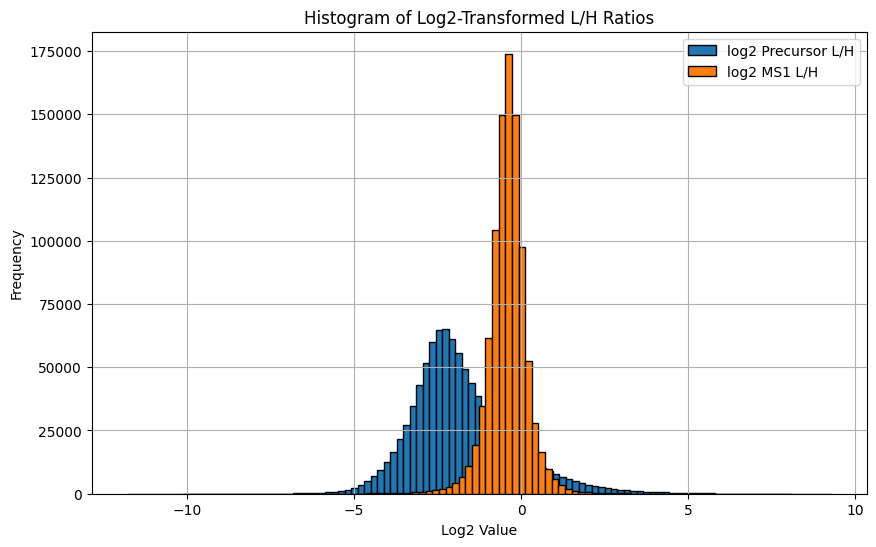

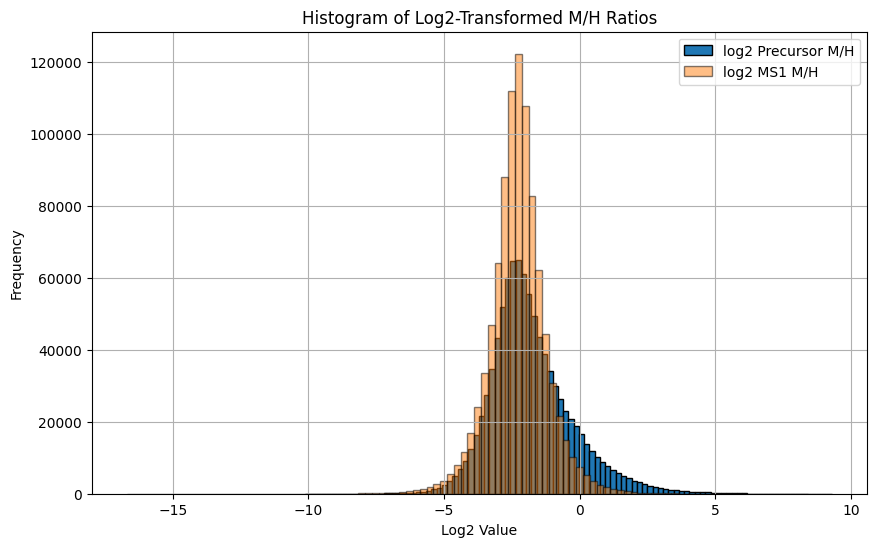

In [8]:
df['log2 MS1 L/H'] = np.log2(df['Precursor.Translated L/H'])
df['log2 Precursor L/H'] = np.log2(df['Ms1.Translated L/H'])

df['log2 MS1 M/H'] = np.log2(df['Precursor.Translated M/H'])
df['log2 Precursor M/H'] = np.log2(df['Ms1.Translated M/H'])

df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['log2 MS1 L/H', 'log2 Precursor L/H', 'log2 MS1 M/H', 'log2 Precursor M/H'])


# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['log2 Precursor L/H'], bins=100, edgecolor='black', label='log2 Precursor L/H')
plt.hist(df['log2 MS1 L/H'], bins=100, edgecolor='black', label='log2 MS1 L/H')

plt.title('Histogram of Log2-Transformed L/H Ratios')
plt.xlabel('Log2 Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['log2 Precursor M/H'], bins=100, edgecolor='black', label='log2 Precursor M/H')
plt.hist(df['log2 MS1 M/H'], bins=100, edgecolor='black',alpha=0.5, label='log2 MS1 M/H')

plt.title('Histogram of Log2-Transformed M/H Ratios')
plt.xlabel('Log2 Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

How do these distributions look after removing all rows where you require at least on value of MS1 and Precursor translated?

In [9]:
df = df.dropna(subset=['Precursor.Translated L/H','Ms1.Translated L/H'])
df = df.dropna(subset=['Precursor.Translated M/H','Ms1.Translated M/H'])

In [10]:
df_sorted = df.sort_values(by='Precursor.Translated L/H', ascending=False)
df_sorted.head()

,Unnamed: 0,Run,Protein.Group,Precursor.Id,Label L,Ms1.Translated L,Precursor.Quantity L,Precursor.Translated L,Label M,Ms1.Translated M,...,Precursor.Quantity H,Precursor.Translated H,Precursor.Translated L/H,Ms1.Translated L/H,Precursor.Translated M/H,Ms1.Translated M/H,log2 MS1 L/H,log2 Precursor L/H,log2 MS1 M/H,log2 Precursor M/H
3265839,3265839,G3_aux_3,P01889-HLA-B,DGEDQTQDTELVETRPAGDR3,L,3261600.0,2684220.0,2684220.0,M,3261600.0,...,10029.4,10029.40,267.635153,0.357093,190.771133,0.357093,8.064124,-1.485629,7.575699,-1.485629
2722692,2722692,G2_aux_3,P47895-ALDH1A3,EQIC(UniMod:4)EVEEGDKPDVDK3,L,29946100.0,3065820.0,3065820.0,M,29946100.0,...,256808.0,11806.40,259.674414,52.623893,86.693658,52.623893,8.020560,5.717646,6.437855,5.717646
3326667,3326667,G3_aux_3,Q99714-HSD17B10,VC(UniMod:4)NFLASQVPFPSR2,L,125744000.0,543069.0,366262.0,M,125744000.0,...,830880.0,1767.63,207.205128,25.926544,25.926636,25.926544,7.694916,4.696358,4.696363,4.696358
2477011,2477011,G2_3,Q8NCN5-PDPR,INAGLNVIGIPSEIISPK2,L,589171.0,1638020.0,1638020.0,M,589171.0,...,706112.0,7978.69,205.299366,0.312016,57.861504,0.312016,7.681585,-1.680307,5.854532,-1.680307
1018313,1018313,3D_repeat_aux_2,Q9Y3D0-CIAO2B,VGGGGVGGGLLENANPLIYQR3,L,448639.0,217713.0,26802800.0,M,448639.0,...,579532.0,172407.00,155.462365,0.061250,1.240495,0.061250,7.280422,-4.029143,0.310916,-4.029143


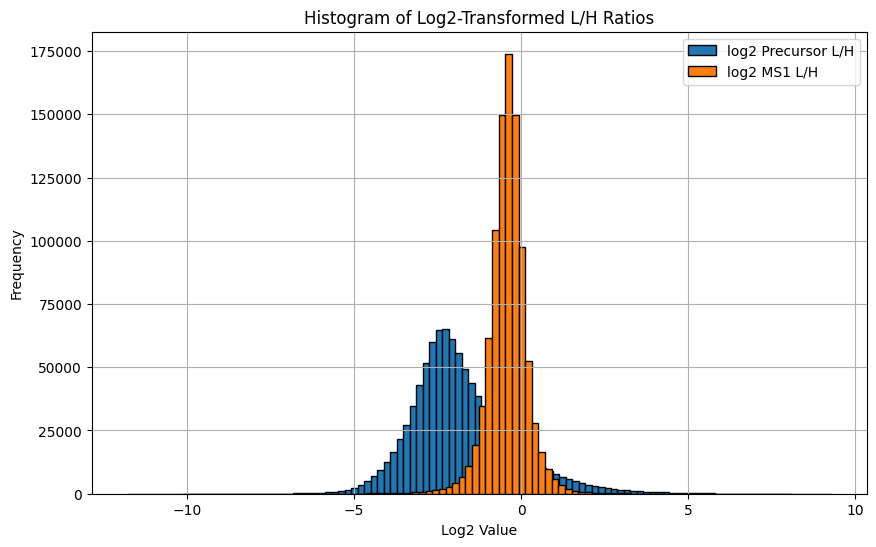

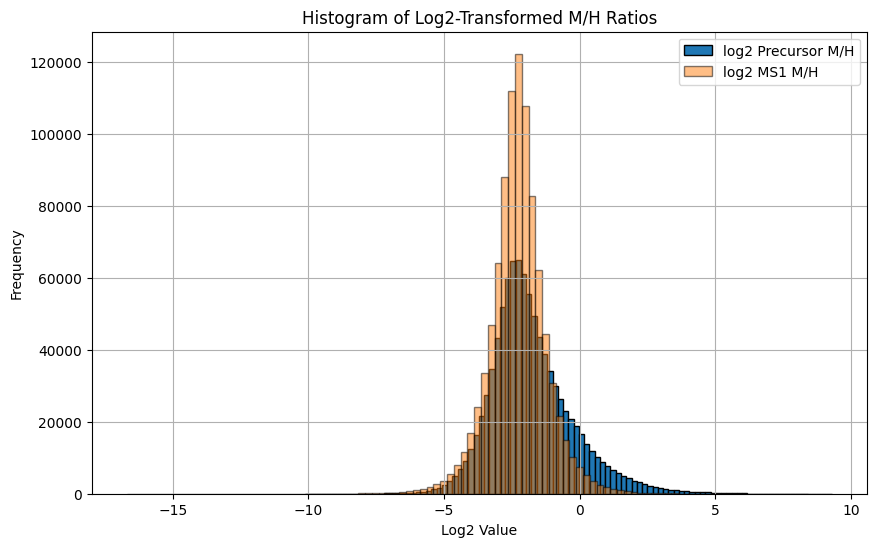

In [11]:
# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(df['log2 Precursor L/H'], bins=100, edgecolor='black', label='log2 Precursor L/H')
plt.hist(df['log2 MS1 L/H'], bins=100, edgecolor='black', label='log2 MS1 L/H')

plt.title('Histogram of Log2-Transformed L/H Ratios')
plt.xlabel('Log2 Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['log2 Precursor M/H'], bins=100, edgecolor='black', label='log2 Precursor M/H')
plt.hist(df['log2 MS1 M/H'], bins=100, edgecolor='black',alpha=0.5, label='log2 MS1 M/H')

plt.title('Histogram of Log2-Transformed M/H Ratios')
plt.xlabel('Log2 Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()